# 金融预测1 - GRU单一模型

In [316]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import copy
plt.rcParams['font.sans-serif']=['SimHei']#画图显示中文字

# 1、处理数据

In [303]:
#读数据
df = pd.read_csv("data//ch_data.csv",encoding="utf")
df.head()

,code,date,中短端利率_2Ygk_std5_raw,中短端利率_2Ygk_std10_raw,中短端利率_2Ygk_std20_raw,中短端利率_5Ygk_std5_raw,中短端利率_5Ygk_std10_raw,中短端利率_5Ygk_std20_raw,中短端利率_2Ygz_std5_raw,中短端利率_2Ygz_std10_raw,...,中短端利率_5Ygk_percentb10_histquantile1Y,中短端利率_5Ygk_percentb10_histquantile3Y,中短端利率_5Ygk_percentb10_histquantile5Y,中短端利率_5Ygk_width20_histquantile1Y,中短端利率_5Ygk_width20_histquantile3Y,中短端利率_5Ygk_width20_histquantile5Y,中短端利率_5Ygk_percentb20_histquantile1Y,中短端利率_5Ygk_percentb20_histquantile3Y,中短端利率_5Ygk_percentb20_histquantile5Y,y
0,code,2016-01-06,2.247361,3.533670,3.467743,3.335284,2.989162,3.394744,1.603085,1.876949,...,80.0,70.266667,64.56,92.0,91.200000,92.16,60.8,51.600000,43.36,-16.97
1,code,2016-01-07,3.034678,3.495714,3.452480,3.943536,3.117450,3.394981,2.085253,1.941460,...,63.2,57.600000,52.16,90.0,89.333333,90.80,55.6,47.466667,39.20,-12.34
2,code,2016-01-08,3.584543,3.514974,3.448637,5.105828,3.595523,3.552630,2.433886,1.925864,...,34.4,26.933333,22.16,88.8,87.733333,89.44,39.6,30.666667,24.16,-8.47
3,code,2016-01-11,3.363892,3.479087,3.394692,4.027828,3.701023,3.583271,2.097026,1.934485,...,18.4,16.533333,13.92,87.6,87.066667,88.96,28.4,22.933333,18.24,-5.51
4,code,2016-01-12,2.118945,3.437829,3.427486,2.305107,4.309655,3.762095,1.412261,2.182807,...,5.6,5.866667,5.28,86.8,86.666667,88.64,8.4,7.733333,6.80,-0.72


In [304]:
#时间数据转换为时间戳
df["date"] = df["date"].apply(lambda x:pd.to_datetime(x).value)
df.head()

,code,date,中短端利率_2Ygk_std5_raw,中短端利率_2Ygk_std10_raw,中短端利率_2Ygk_std20_raw,中短端利率_5Ygk_std5_raw,中短端利率_5Ygk_std10_raw,中短端利率_5Ygk_std20_raw,中短端利率_2Ygz_std5_raw,中短端利率_2Ygz_std10_raw,...,中短端利率_5Ygk_percentb10_histquantile1Y,中短端利率_5Ygk_percentb10_histquantile3Y,中短端利率_5Ygk_percentb10_histquantile5Y,中短端利率_5Ygk_width20_histquantile1Y,中短端利率_5Ygk_width20_histquantile3Y,中短端利率_5Ygk_width20_histquantile5Y,中短端利率_5Ygk_percentb20_histquantile1Y,中短端利率_5Ygk_percentb20_histquantile3Y,中短端利率_5Ygk_percentb20_histquantile5Y,y
0,code,1452038400000000000,2.247361,3.533670,3.467743,3.335284,2.989162,3.394744,1.603085,1.876949,...,80.0,70.266667,64.56,92.0,91.200000,92.16,60.8,51.600000,43.36,-16.97
1,code,1452124800000000000,3.034678,3.495714,3.452480,3.943536,3.117450,3.394981,2.085253,1.941460,...,63.2,57.600000,52.16,90.0,89.333333,90.80,55.6,47.466667,39.20,-12.34
2,code,1452211200000000000,3.584543,3.514974,3.448637,5.105828,3.595523,3.552630,2.433886,1.925864,...,34.4,26.933333,22.16,88.8,87.733333,89.44,39.6,30.666667,24.16,-8.47
3,code,1452470400000000000,3.363892,3.479087,3.394692,4.027828,3.701023,3.583271,2.097026,1.934485,...,18.4,16.533333,13.92,87.6,87.066667,88.96,28.4,22.933333,18.24,-5.51
4,code,1452556800000000000,2.118945,3.437829,3.427486,2.305107,4.309655,3.762095,1.412261,2.182807,...,5.6,5.866667,5.28,86.8,86.666667,88.64,8.4,7.733333,6.80,-0.72


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Columns: 1006 entries, code to y
dtypes: float64(1004), int64(1), object(1)
memory usage: 13.7+ MB


In [306]:
#取特征列
XAll = df.iloc[:,1:-1]
XAll.head()
XAll.shape

(1785, 1004)

In [307]:
#取结果列
YAll = df.iloc[:,-1:]
YAll.head()
YAll.shape

(1785, 1)

In [308]:
#划分数据集
X_train,X_test,y_train,y_test = train_test_split(
    XAll,YAll,
    test_size = 0.3,#30%用做测试集
    random_state = 7
)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1249, 1004)
(1249, 1)
(536, 1004)
(536, 1)


In [309]:
#归一化，标准化
ssObj = StandardScaler()
X_train_std = ssObj.fit_transform(X_train)
X_test_std = ssObj.transform(X_test)#先拆分训练测试集，再标准化，保持真实性
y_train_std = ssObj.fit_transform(y_train)
y_test_std = ssObj.transform(y_test)
print(X_train_std.shape)
print(y_train_std.shape)
print(X_test_std.shape)
print(y_test_std.shape)
# print(X_train_std)
# print(y_train_std)

(1249, 1004)
(1249, 1)
(536, 1004)
(536, 1)


In [310]:
#根据模型需要变形X
time_steps = 4
#参数：1、训练集数据条数，2、时间步，3、特征数input_size，行列静态二维变为按时间动态交错输入带时序属性的三维，特征数因此打乱自适应）
X_train_reshape = X_train_std.reshape(X_train_std.shape[0],time_steps,-1)
X_test_reshape = X_test_std.reshape(X_test_std.shape[0],time_steps,-1)
print(X_train_reshape.shape)
print(X_test_reshape.shape)
# print(X_train_reshape)

(1249, 4, 251)
(536, 4, 251)


In [311]:
#根据模型需要变形Y
y_train_reshape = y_train_std.reshape(y_train_std.shape[0],-1)#结果列拉平一列，一行数据对应一个结果
y_test_reshape = y_test_std.reshape(y_test_std.shape[0],-1)
print(y_train_reshape.shape)
print(y_test_reshape.shape)

(1249, 1)
(536, 1)


In [312]:
#数据转换为模型需要的pytorch张量Tensor
X_train = torch.Tensor(X_train_reshape)
y_train = torch.Tensor(y_train_reshape)
X_test = torch.Tensor(X_test_reshape)
y_test = torch.Tensor(y_test_reshape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train

torch.Size([1249, 4, 251])
torch.Size([1249, 1])
torch.Size([536, 4, 251])
torch.Size([536, 1])


# 2、模型处理

In [313]:
#建模-GRU
class GRUStock(torch.nn.Module):
    #初始化
    #参数：输入，隐层，输出,1层GRU
    def __init__(self,input_size,hidden_size,output_size,num_layers):
#         print("input_size:",input_size)
#         print("hidden_size:",hidden_size)
#         print("output_size:",output_size)
        
        super(GRUStock,self).__init__()
        #定义GRU模型，传入输入特征、隐藏层
        self.gru = torch.nn.GRU(input_size,
                                hidden_size,
                                num_layers)
        #定义全连接层，处理分类结果
        self.fc = torch.nn.Linear(hidden_size,output_size)
        
    #前向传播做输入一输出的计算
    def forward(self,x):
#         print("x shape：",x.shape)
        out,_=self.gru(x)#调用模型处理xh，计算输出
        rs_out = self.fc(out[:,-1,:])#处理分类结果
#         print(rs_out.shape)
        #返回结果
        return rs_out

In [319]:
#设置超参数
input_size=X_train.shape[2]
hidden_size=64
output_size=1
num_layers =1
num_epochs = 800#训练多少轮
learning_rate = 0.001
time_steps = 4#数据输入的时间步长切分
    
#实例化GRU
gruModel = GRUStock(input_size,hidden_size,output_size,num_layers)
#定义学习器
optimizer = torch.optim.Adam(gruModel.parameters(),lr=learning_rate,weight_decay=0.001)
#定义损失函数
criterion = torch.nn.MSELoss()


#用于记录每个epoch的loss值
train_loss=[]

#==训练==
min_loss_val = 10#初始化最小loss
best_model = None#定义初始最好模型
for epoch in range(num_epochs):
    optimizer.zero_grad()#梯度清零
    #调用模型输入数据，计算，前向传播
    output = gruModel(X_train)
    loss = criterion(output,y_train.float())#计算损失
    loss.backward()#反向传播
    optimizer.step()#更新
    
    #存储loss值
    train_loss.append(loss.item())
    
    #打印loss,50个epoch打印一次
    if epoch % 50 == 0:
        print(f"Epoch{epoch}loss：{loss.item()}")
        #最小loss置为最好模型并保存    
        if loss <= min_loss_val:
            min_loss_val = loss
            best_model = copy.deepcopy(gruModel)
            print("save best_model")
            torch.save(best_model.state_dict(),'model//best_model.pth')
gruModel = best_model
    

Epoch0loss：1.010032057762146
save best_model
Epoch50loss：0.391811341047287
save best_model
Epoch100loss：0.04712596908211708
save best_model
Epoch150loss：0.004457511007785797
save best_model
Epoch200loss：0.004824649542570114
Epoch250loss：0.001461818814277649
save best_model
Epoch300loss：0.0011770972050726414
save best_model
Epoch350loss：0.0009818535763770342
save best_model
Epoch400loss：0.0008341760258190334
save best_model
Epoch450loss：0.0008583276649005711
Epoch500loss：0.0025506047531962395
Epoch550loss：0.0011523468419909477
Epoch600loss：0.000553594552911818
save best_model
Epoch650loss：0.0012746381107717752
Epoch700loss：0.004747691564261913
Epoch750loss：0.00047787080984562635
save best_model


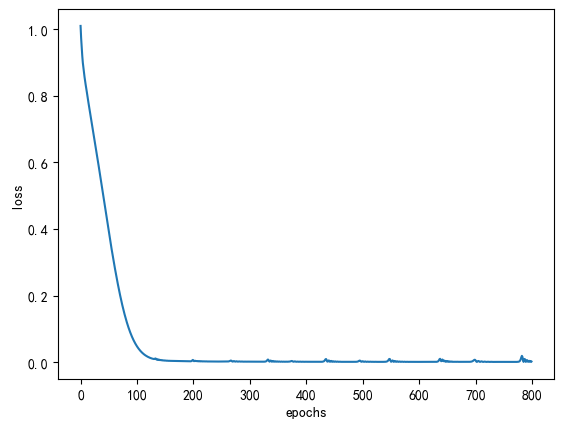

In [320]:
#画图
f1 = plt.figure()
plt.plot(range(len(train_loss)),train_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig("loss.png")
plt.show()

In [ ]:
#读模型
# torch.load('best_model.pth')

In [322]:
#预测
y_pred = gruModel(X_test)
y_pred_rs = y_pred.detach().numpy()#将张量分离并转换为NumPy数组
y_test_rs = y_test.detach().numpy()

C:\Users\A\AppData\Local\Temp\ipykernel_15192\1913093716.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig("testGru.png")
C:\Users\A\.conda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


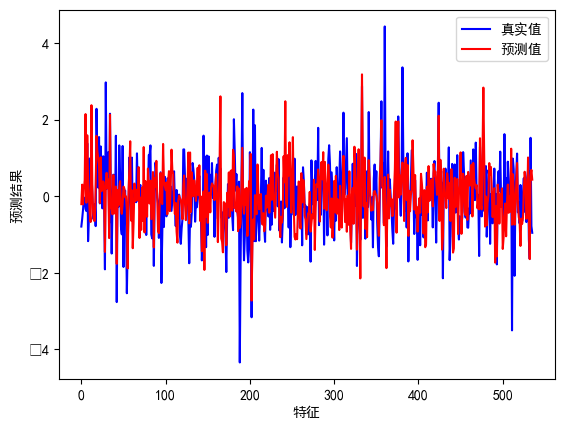

In [323]:
#画图
f2=plt.figure()
plt.plot(y_test_rs,color="blue",label="真实值")
plt.plot(y_pred_rs,color="red",label="预测值")
plt.legend()
plt.xlabel("特征")
plt.ylabel("预测结果")
plt.savefig("testGru.png")
plt.show()

In [324]:
#模型评估
test_rmse = np.sqrt(np.mean(np.square(y_pred_rs,y_test_rs)))
test_mae = np.mean(np.abs(y_pred_rs,y_test_rs))
print("test_rmse:",test_rmse,"\n","test_mae:",test_mae)

test_rmse: 0.76050615 
 test_mae: 0.58456796
